# Natural Statistics Cross-linguistic

Maximum turn-taking samples contingency variable generation.

In [5]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, "data_proc")
import contingent_extraction
import warnings
warnings.filterwarnings('ignore')

In [6]:
maxturn_dat = pd.read_csv("../data/maxturn_dat.csv", low_memory=False)

----

#### How many languages are we analyzing?

In [7]:
maxturn_dat["language"].unique() # list of all langauges across corpora
int_maxturn_dat = maxturn_dat[~maxturn_dat["language"].str.contains("eng")]
len(int_maxturn_dat["language"].unique()) # language count

15

15 languages + 1 (eng) - 1 (por swe). Thus, 15 langauges! por swe (Portugese and Swedish) is removed because we will only analyze monolingual corpora first.

----

#### How many participants are we analyzing?

Get only monolingual corpora to finalize maxvoc dataframe.

In [8]:
eng_maxturn_dat = maxturn_dat[maxturn_dat["language"]=="eng"] # only english
maxturn_dat_inc = eng_maxturn_dat.append(int_maxturn_dat) # english and non-english
maxturn_dat_inc = maxturn_dat_inc[maxturn_dat_inc["language"]!= "por swe"]# exclude bilingual (por swe)
len(maxturn_dat_inc["language"].unique())

15

In [9]:
maxturn_dat_inc.to_csv("../data/maxturn_dat_inc.csv")

In [10]:
maxturn_dat_inc = pd.read_csv("../data/maxturn_dat_inc.csv",index_col=0,low_memory=False)
maxturn_dat_inc=maxturn_dat_inc[maxturn_dat_inc["language"]!="ara"]
maxturn_dat_inc=maxturn_dat_inc[(maxturn_dat_inc["target_child_age"]>=5) & (maxturn_dat_inc["target_child_age"]<=30)]# exclude under 5- and over 30-month-olds

In [11]:
# create language_name column

language_labels = pd.read_csv("../data/language_labels.csv")

language_labels=language_labels.rename(columns={"Language":"language"})

maxturn_dat_inc=maxturn_dat_inc.merge(language_labels,on='language',how="right")

In [18]:
print("There are", 
      len(maxturn_dat_inc["language"].unique()),
      "different monolingual languages in this dataset.")

print("There are",
      len(maxturn_dat_inc["target_child_id"].unique()),
      "infants in this dataset.")

print("There are",
      len(maxturn_dat_inc["transcript_id"].unique()),
      "different transcripts in this dataset")

There are 14 different monolingual languages in this dataset.
There are 425 infants in this dataset.
There are 1726 different transcripts in this dataset


In [19]:
# how many children per language
child_counts = maxturn_dat_inc.groupby(['language','target_child_id']).nunique()
count_table = child_counts.groupby(['language']).size().to_frame('count').reset_index()
print(count_table.to_markdown())

|    | language   |   count |
|---:|:-----------|--------:|
|  0 | deu        |       4 |
|  1 | eng        |     379 |
|  2 | est        |       3 |
|  3 | fas        |       1 |
|  4 | fra        |      15 |
|  5 | hrv        |       3 |
|  6 | jpn        |       6 |
|  7 | kor        |       1 |
|  8 | nor        |       3 |
|  9 | pol        |       1 |
| 10 | por        |       2 |
| 11 | spa        |       3 |
| 12 | swe        |       3 |
| 13 | zho        |       1 |


In [20]:
# how many transcripts per language
transcript_counts = maxturn_dat_inc.groupby(['language','transcript_id']).nunique()
count_table = transcript_counts.groupby(['language']).size().to_frame('count').reset_index()
print(count_table.to_markdown())

|    | language   |   count |
|---:|:-----------|--------:|
|  0 | deu        |      39 |
|  1 | eng        |    1010 |
|  2 | est        |      22 |
|  3 | fas        |      12 |
|  4 | fra        |     258 |
|  5 | hrv        |      79 |
|  6 | jpn        |     139 |
|  7 | kor        |      37 |
|  8 | nor        |      56 |
|  9 | pol        |       1 |
| 10 | por        |      24 |
| 11 | spa        |      31 |
| 12 | swe        |      16 |
| 13 | zho        |       2 |


In [21]:
# how many transcripts per language
transcript_x_child_counts = maxturn_dat_inc.groupby(['language','transcript_id','target_child_id']).nunique()
transcript_x_child_count_table = transcript_x_child_counts.groupby(['language','target_child_id']).size().to_frame('count').reset_index()
print(transcript_x_child_count_table.to_markdown())

|     | language   |   target_child_id |   count |
|----:|:-----------|------------------:|--------:|
|   0 | deu        |             18301 |      12 |
|   1 | deu        |             18359 |      14 |
|   2 | deu        |             18383 |      10 |
|   3 | deu        |             18403 |       3 |
|   4 | eng        |              1714 |       1 |
|   5 | eng        |              1719 |       1 |
|   6 | eng        |              1732 |       1 |
|   7 | eng        |              2335 |      57 |
|   8 | eng        |              2533 |      24 |
|   9 | eng        |              2537 |       2 |
|  10 | eng        |              2539 |       1 |
|  11 | eng        |              3144 |       9 |
|  12 | eng        |              3395 |       5 |
|  13 | eng        |              3842 |      11 |
|  14 | eng        |              3846 |       9 |
|  15 | eng        |              3849 |       5 |
|  16 | eng        |              3853 |       3 |
|  17 | eng        |           

<AxesSubplot:>

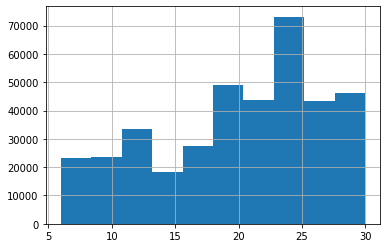

In [22]:
# distribution of age groups
ages = maxturn_dat_inc['target_child_age']
ages.hist()

In [23]:
# how many corpora
corpora = pd.DataFrame(maxturn_dat_inc["corpus_name"].unique())
print(corpora.to_markdown())

|    | 0            |
|---:|:-------------|
|  0 | Leo          |
|  1 | Rigol        |
|  2 | Bernstein    |
|  3 | Peters       |
|  4 | Rollins      |
|  5 | Bloom        |
|  6 | MacWhinney   |
|  7 | Brent        |
|  8 | Nelson       |
|  9 | Braunwald    |
| 10 | Soderstrom   |
| 11 | Sachs        |
| 12 | McCune       |
| 13 | NewmanRatner |
| 14 | Providence   |
| 15 | Argus        |
| 16 | Zupping      |
| 17 | Family       |
| 18 | York         |
| 19 | Lyon         |
| 20 | Yamaguchi    |
| 21 | Paris        |
| 22 | Kovacevic    |
| 23 | Ishii        |
| 24 | MiiPro       |
| 25 | Miyata       |
| 26 | Ryu          |
| 27 | Garmann      |
| 28 | WeistJarosz  |
| 29 | Santos       |
| 30 | Nieva        |
| 31 | Remedi       |
| 32 | Lund         |
| 33 | Andren       |
| 34 | Tong         |


In [24]:
age_counts = maxturn_dat_inc.groupby(['language','transcript_id','target_child_age']).nunique()
age_counts = age_counts.iloc[:, 0:2].reset_index()
age_counts['target_child_age'].mean()

age_counts=age_counts.merge(language_labels,on='language',how="right")

In [25]:
%load_ext rpy2.ipython

In [26]:
%%R -i age_counts

library('ggplot2')

p <- ggplot(data=age_counts, aes(x = target_child_age, fill = Language_name)) +
     geom_histogram(binwidth=2.5) +
     facet_wrap(. ~ Language_name,ncol = 7) +
     theme_classic() + theme(text = element_text(size=16),
                             legend.title = element_blank(),
                             legend.background = element_rect(fill=alpha("white",0.90),
                                                            size=0, linetype="dotted",
                                                            colour = "white"),
                             legend.text=element_text(size=16)) +
     labs(x = "Child age (months)", y = "Freq")
    
     ggsave("../figures/age_hist_maxturn.pdf", width = 11.7, height = 6.2)

In [27]:
maxturn_dat_inc_age = maxturn_dat_inc.groupby(['Language_name','transcript_id','target_child_id','target_child_age']).nunique().reset_index()
maxturn_dat_inc_age = maxturn_dat_inc_age[['Language_name','transcript_id','target_child_id','target_child_age']]

In [28]:
%%R -i maxturn_dat_inc_age

library('plotrix')
library('dplyr')

age_summary <- maxturn_dat_inc_age %>% group_by(Language_name) %>%
summarise_all(funs(mean,std.error))
age_summary

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# A tibble: 14 x 7
   Language_name transcript_id_mean target_child_id_mean target_child_age_mean
   <chr>                      <dbl>                <dbl>                 <dbl>
 1 Croatian                  28147.               17516.                  23.7
 2 English                   15216.                7738.                  17.1
 3 Estonian                  19546.               12373.                  23.7
 4 French                    42988.               22339.                  21.9
 5 German                    29927.               18351.                  25.8
 6 Japanese                  20943.               13487.                  21.9
 7 Korean                    27233.               16738                   21.4
 8 Mandarin                  16284.                9827                   21.2
 9 Norwegian                 43952.               22855.                  18.4
10 Persian                   20198.               13148                   26.7
11 Polish                    4773

In [29]:
%%R

library('ggplot2')


p <- ggplot(data=age_summary, aes(x = target_child_age_mean,
                                  y=Language_name, moe = target_child_age_std.error,
                                  color = Language_name)) +
     geom_point(aes(x = target_child_age_mean), size = 3) +
     geom_errorbarh(aes(xmin = target_child_age_mean - target_child_age_std.error,
                        xmax = target_child_age_mean + target_child_age_std.error), height = 0.5, size = 2) +
     theme_classic() + theme(text = element_text(size=16),
                             legend.title = element_blank(),
                             legend.background = element_rect(fill=alpha("white",0.90),
                                                            size=0, linetype="dotted",
                                                            colour = "white"),
                             legend.text=element_text(size=16)) +
     labs(x = "Child age (months)", y = "Language") +
     scale_y_discrete(limits=rev)
     ggsave("../figures/age_line_max_turn.pdf", width = 11.7, height = 6.2)

----

#### Contingency assignment

In [12]:
#
# create "parent" column
#
# add to this to include more speakers in "caregiver" category
#

conditions = [
    (maxturn_dat_inc["speaker_role"]=="Mother") | (maxturn_dat_inc["speaker_role"]=="Father"),
    (maxturn_dat_inc["speaker_role"]=="Target_Child")]

choices = ['caregiver', 'target_child']

maxturn_dat_inc['caregiver'] = np.select(conditions, choices, default='other')

Using a contingency window of 3 to start:

In [13]:
maxturn_dat_inc = contingent_extraction.assign_contingency(maxturn_dat_inc,3,.001)

In [14]:
maxturn_dat_inc.to_csv("../data/maxturn_dat_inc_master.csv")